In [27]:
import pandas as pd
import numpy as np

# Load the NEW realistic dataset
df = pd.read_csv('data/realistic_pricing_dataset.csv')

In [28]:
# Check the shape and first few rows
print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())
df_copy=df.copy()

Dataset shape: (1050, 16)

First 5 rows:
  product_id product_name     category   brand cost_price competitor_price  \
0   PROD0352  Product 352  Electronics     NaN   ₹2562.71         ₹3432.78   
1   PROD0689  Product 689         Home     NaN  ₹-1934.42         ₹2820.53   
2   PROD0485  Product 485         Toys  BrandD    ₹574.74          ₹739.22   
3   PROD0388  Product 388       Sports  BrandE    ₹877.19          ₹1065.6   
4   PROD0031   Product 31        Books  BrandB     ₹375.2          ₹550.63   

  our_historical_price  discount_pct  rating  page_views  conversion_rate  \
0             ₹3339.06         18.60     3.9      3487.0           0.1115   
1             ₹2873.52         23.47     3.3         NaN           0.1043   
2              ₹756.72         11.34     3.8      5081.0           0.0100   
3             ₹1053.49           NaN     3.9      3275.0           0.0100   
4              ₹531.17         12.83     4.4      8645.0           0.0215   

   units_sold_last_30d  for

In [29]:
# Check data types
print("Data types:")
print(df_copy.dtypes)
print("\n" + "="*50)

# Count missing values in each column
print("\nMissing values:")
missing = df_copy.isnull().sum()
print(missing)
print("\n" + "="*50)

# Show percentage of missing values
print("\nMissing percentage:")
missing_pct = (df_copy.isnull().sum() / len(df_copy)) * 100
print(missing_pct.round(2))

Data types:
product_id               object
product_name             object
category                 object
brand                    object
cost_price               object
competitor_price         object
our_historical_price     object
discount_pct            float64
rating                  float64
page_views              float64
conversion_rate         float64
units_sold_last_30d       int64
forecast_demand         float64
inventory_on_hand       float64
shipping_cost            object
optimal_price            object
dtype: object


Missing values:
product_id                0
product_name              0
category                  0
brand                   108
cost_price               63
competitor_price         13
our_historical_price      0
discount_pct            157
rating                    0
page_views               76
conversion_rate          74
units_sold_last_30d       0
forecast_demand          52
inventory_on_hand       101
shipping_cost            16
optimal_price           

In [30]:
# Check for duplicate rows
duplicates = df_copy.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Remove duplicates
df_copy = df_copy.drop_duplicates()
print(f"Shape after removing duplicates: {df_copy.shape}")

Number of duplicate rows: 50
Shape after removing duplicates: (1000, 16)


In [31]:
import re

# Function to clean price columns
def clean_price(value):
    if pd.isna(value):  # If missing, keep it as NaN
        return None
    
    value_str = str(value)  # Convert to string
    
    # If it says 'N/A', 'TBD', 'Free', etc., make it NaN
    if value_str.lower() in ['n/a', 'tbd', 'free', 'nan']:
        return None
    
    # Remove ₹, Rs, commas, spaces
    cleaned = re.sub(r'[₹Rs,\s]', '', value_str)
    
    try:
        return float(cleaned)  # Convert to number
    except:
        return None

# Clean ALL price columns
price_cols = ['cost_price', 'competitor_price', 'our_historical_price', 
              'shipping_cost', 'optimal_price']

print("Cleaning all price columns...")
for col in price_cols:
    print(f"\nCleaning {col}...")
    print(f"Before: {df_copy[col].head()}")
    df_copy[col] = df_copy[col].apply(clean_price)
    print(f"After: {df_copy[col].head()}")
    print(f"Type: {df_copy[col].dtype}")

print("\n✅ All price columns cleaned!")

Cleaning all price columns...

Cleaning cost_price...
Before: 0     ₹2562.71
1    ₹-1934.42
2      ₹574.74
3      ₹877.19
4       ₹375.2
Name: cost_price, dtype: object
After: 0    2562.71
1   -1934.42
2     574.74
3     877.19
4     375.20
Name: cost_price, dtype: float64
Type: float64

Cleaning competitor_price...
Before: 0    ₹3432.78
1    ₹2820.53
2     ₹739.22
3     ₹1065.6
4     ₹550.63
Name: competitor_price, dtype: object
After: 0    3432.78
1    2820.53
2     739.22
3    1065.60
4     550.63
Name: competitor_price, dtype: float64
Type: float64

Cleaning our_historical_price...
Before: 0    ₹3339.06
1    ₹2873.52
2     ₹756.72
3    ₹1053.49
4     ₹531.17
Name: our_historical_price, dtype: object
After: 0    3339.06
1    2873.52
2     756.72
3    1053.49
4     531.17
Name: our_historical_price, dtype: float64
Type: float64

Cleaning shipping_cost...
Before: 0    ₹120.53
1     ₹92.33
2     ₹33.78
3      ₹42.3
4     ₹19.45
Name: shipping_cost, dtype: object
After: 0    120.53
1   

In [32]:
# Clean shipping_cost
print("Before cleaning shipping_cost:")
print(df_copy['shipping_cost'].head(10))

df_copy['shipping_cost'] = df_copy['shipping_cost'].apply(clean_price)

print("\nAfter cleaning shipping_cost:")
print(df_copy['shipping_cost'].head(10))
print(f"Type: {df_copy['shipping_cost'].dtype}")

Before cleaning shipping_cost:
0    120.53
1     92.33
2     33.78
3     42.30
4     19.45
5       NaN
6     71.61
7    116.70
8     29.83
9     20.26
Name: shipping_cost, dtype: float64

After cleaning shipping_cost:
0    120.53
1     92.33
2     33.78
3     42.30
4     19.45
5       NaN
6     71.61
7    116.70
8     29.83
9     20.26
Name: shipping_cost, dtype: float64
Type: float64


In [33]:
# Check which columns have negative values
print("=== CHECKING FOR NEGATIVE VALUES ===\n")

# Price columns (should not be negative)
price_cols = ['cost_price', 'competitor_price', 'our_historical_price', 
              'shipping_cost', 'optimal_price']

for col in price_cols:
    negative_count = (df_copy[col] < 0).sum()
    if negative_count > 0:
        print(f"{col}: {negative_count} negative values found ❌")
    else:
        print(f"{col}: No negative values ✅")

print("\n" + "="*50 + "\n")

# Other columns
other_cols = ['units_sold_last_30d', 'forecast_demand', 'inventory_on_hand', 
              'discount_pct', 'conversion_rate']

for col in other_cols:
    negative_count = (df_copy[col] < 0).sum()
    if negative_count > 0:
        print(f"{col}: {negative_count} negative values found ❌")
    else:
        print(f"{col}: No negative values ✅")

=== CHECKING FOR NEGATIVE VALUES ===

cost_price: 48 negative values found ❌
competitor_price: No negative values ✅
our_historical_price: No negative values ✅
shipping_cost: No negative values ✅
optimal_price: No negative values ✅


units_sold_last_30d: 50 negative values found ❌
forecast_demand: 30 negative values found ❌
inventory_on_hand: No negative values ✅
discount_pct: 14 negative values found ❌
conversion_rate: 1 negative values found ❌


In [34]:
# Fix negative values

# For prices: negative doesn't make sense, set to NaN
print("Fixing cost_price...")
df_copy.loc[df_copy['cost_price'] < 0, 'cost_price'] = np.nan
print(f"Set {(df_copy['cost_price'].isna()).sum()} cost_price values to NaN")

# For units_sold: negative is impossible, set to 0
print("\nFixing units_sold_last_30d...")
df_copy.loc[df_copy['units_sold_last_30d'] < 0, 'units_sold_last_30d'] = 0
print(f"Set negative units_sold to 0")

# For forecast_demand: negative is impossible, set to 0
print("\nFixing forecast_demand...")
df_copy.loc[df_copy['forecast_demand'] < 0, 'forecast_demand'] = 0
print(f"Set negative forecast_demand to 0")

# For discount_pct: should be between 0 and 100
print("\nFixing discount_pct...")
df_copy.loc[(df_copy['discount_pct'] < 0) | (df_copy['discount_pct'] > 100), 'discount_pct'] = np.nan
print(f"Total NaN in discount_pct: {df_copy['discount_pct'].isna().sum()}")

# For conversion_rate: should be between 0 and 1
print("\nFixing conversion_rate...")
df_copy.loc[(df_copy['conversion_rate'] < 0) | (df_copy['conversion_rate'] > 1), 'conversion_rate'] = np.nan
print(f"Total NaN in conversion_rate: {df_copy['conversion_rate'].isna().sum()}")

print("\n✅ All negative values fixed!")

Fixing cost_price...
Set 108 cost_price values to NaN

Fixing units_sold_last_30d...
Set negative units_sold to 0

Fixing forecast_demand...
Set negative forecast_demand to 0

Fixing discount_pct...
Total NaN in discount_pct: 180

Fixing conversion_rate...
Total NaN in conversion_rate: 83

✅ All negative values fixed!


In [35]:
# Check rating range
print("Rating column check:")
print(f"Min rating: {df_copy['rating'].min()}")
print(f"Max rating: {df_copy['rating'].max()}")
print(f"\nRatings < 1: {(df_copy['rating'] < 1).sum()}")
print(f"Ratings > 5: {(df_copy['rating'] > 5).sum()}")

# Fix rating - cap at 1 and 5
df_copy.loc[df_copy['rating'] < 1, 'rating'] = 1.0
df_copy.loc[df_copy['rating'] > 5, 'rating'] = 5.0

print(f"\nAfter fixing:")
print(f"Min rating: {df_copy['rating'].min()}")
print(f"Max rating: {df_copy['rating'].max()}")
print(f"Missing ratings: {df_copy['rating'].isna().sum()}")

Rating column check:
Min rating: 0.5251287442492683
Max rating: 5.982985280876373

Ratings < 1: 9
Ratings > 5: 33

After fixing:
Min rating: 1.0
Max rating: 5.0
Missing ratings: 0


In [36]:
# Check missing values now
print("=== MISSING VALUES SUMMARY ===\n")
missing = df_copy.isnull().sum()
missing_pct = (missing / len(df_copy)) * 100

# Show only columns with missing values
missing_df = pd.DataFrame({
    'Missing_Count': missing,
    'Percentage': missing_pct
})
missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Percentage', ascending=False)

print(missing_df)
print(f"\nTotal columns with missing values: {len(missing_df)}")

=== MISSING VALUES SUMMARY ===

                   Missing_Count  Percentage
discount_pct                 180        18.0
cost_price                   108        10.8
brand                        100        10.0
inventory_on_hand            100        10.0
conversion_rate               83         8.3
page_views                    70         7.0
shipping_cost                 50         5.0
forecast_demand               50         5.0
optimal_price                 40         4.0
competitor_price              20         2.0

Total columns with missing values: 10


In [37]:
# Strategy 1: Categorical columns - fill with MODE (most common value)

# Fill brand with most common brand
if df_copy['brand'].isnull().sum() > 0:
    mode_brand = df_copy['brand'].mode()[0]
    df_copy['brand'].fillna(mode_brand, inplace=True)
    print(f"✅ Filled 'brand' with mode: {mode_brand}")
    print(f"   Remaining missing: {df_copy['brand'].isnull().sum()}\n")

✅ Filled 'brand' with mode: BrandD
   Remaining missing: 0



C:\Users\rudra\AppData\Local\Temp\ipykernel_7272\374191465.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy['brand'].fillna(mode_brand, inplace=True)


In [38]:
# Create a cleaned copy - don't modify original
df_clean = df_copy.copy()

print("Working on a copy of the dataset...\n")

# Strategy 2: Price columns - use MEDIAN
# cost_price: fill with median
if df_clean['cost_price'].isnull().sum() > 0:
    median_cost = df_clean['cost_price'].median()
    df_clean['cost_price'] = df_clean['cost_price'].fillna(median_cost)
    print(f"✅ cost_price: filled with median = ₹{median_cost:.2f}")
    print(f"   Remaining missing: {df_clean['cost_price'].isnull().sum()}\n")

# competitor_price: fill with median
if df_clean['competitor_price'].isnull().sum() > 0:
    median_comp = df_clean['competitor_price'].median()
    df_clean['competitor_price'] = df_clean['competitor_price'].fillna(median_comp)
    print(f"✅ competitor_price: filled with median = ₹{median_comp:.2f}")
    print(f"   Remaining missing: {df_clean['competitor_price'].isnull().sum()}\n")

# shipping_cost: fill with median
if df_clean['shipping_cost'].isnull().sum() > 0:
    median_ship = df_clean['shipping_cost'].median()
    df_clean['shipping_cost'] = df_clean['shipping_cost'].fillna(median_ship)
    print(f"✅ shipping_cost: filled with median = ₹{median_ship:.2f}")
    print(f"   Remaining missing: {df_clean['shipping_cost'].isnull().sum()}\n")

Working on a copy of the dataset...

✅ cost_price: filled with median = ₹954.64
   Remaining missing: 0

✅ competitor_price: filled with median = ₹1325.76
   Remaining missing: 0

✅ shipping_cost: filled with median = ₹48.09
   Remaining missing: 0



In [39]:
# Strategy 3: discount_pct - fill based on category (different categories have different discounts)

print("Imputing discount_pct by category...\n")

# Fill missing discount_pct with median of same category
df_clean['discount_pct'] = df_clean.groupby('category')['discount_pct'].transform(
    lambda x: x.fillna(x.median())
)

print(f"✅ discount_pct: filled with category-wise median")
print(f"   Remaining missing: {df_clean['discount_pct'].isnull().sum()}\n")

Imputing discount_pct by category...

✅ discount_pct: filled with category-wise median
   Remaining missing: 0



In [40]:
# Strategy 4: Traffic metrics - use MEDIAN

# page_views: fill with median
if df_clean['page_views'].isnull().sum() > 0:
    median_views = df_clean['page_views'].median()
    df_clean['page_views'] = df_clean['page_views'].fillna(median_views)
    print(f"✅ page_views: filled with median = {median_views:.0f}")
    print(f"   Remaining missing: {df_clean['page_views'].isnull().sum()}\n")

# conversion_rate: fill with median
if df_clean['conversion_rate'].isnull().sum() > 0:
    median_conv = df_clean['conversion_rate'].median()
    df_clean['conversion_rate'] = df_clean['conversion_rate'].fillna(median_conv)
    print(f"✅ conversion_rate: filled with median = {median_conv:.4f}")
    print(f"   Remaining missing: {df_clean['conversion_rate'].isnull().sum()}\n")

✅ page_views: filled with median = 5074
   Remaining missing: 0

✅ conversion_rate: filled with median = 0.0836
   Remaining missing: 0



In [41]:
# Strategy 5: Demand and inventory - use MEDIAN

# forecast_demand: fill with median
if df_clean['forecast_demand'].isnull().sum() > 0:
    median_demand = df_clean['forecast_demand'].median()
    df_clean['forecast_demand'] = df_clean['forecast_demand'].fillna(median_demand)
    print(f"✅ forecast_demand: filled with median = {median_demand:.2f}")
    print(f"   Remaining missing: {df_clean['forecast_demand'].isnull().sum()}\n")

# inventory_on_hand: fill with median
if df_clean['inventory_on_hand'].isnull().sum() > 0:
    median_inventory = df_clean['inventory_on_hand'].median()
    df_clean['inventory_on_hand'] = df_clean['inventory_on_hand'].fillna(median_inventory)
    print(f"✅ inventory_on_hand: filled with median = {median_inventory:.0f}")
    print(f"   Remaining missing: {df_clean['inventory_on_hand'].isnull().sum()}\n")

✅ forecast_demand: filled with median = 318.64
   Remaining missing: 0

✅ inventory_on_hand: filled with median = 452
   Remaining missing: 0



In [42]:
# Strategy 6: For target variable (optimal_price), DROP rows if missing

before = len(df_clean)
df_clean = df_clean.dropna(subset=['optimal_price'])
after = len(df_clean)

print(f"Rows before: {before}")
print(f"Rows after: {after}")
print(f"Rows dropped (missing optimal_price): {before - after}")
print(f"\n✅ Final dataset size: {after} rows")

Rows before: 1000
Rows after: 960
Rows dropped (missing optimal_price): 40

✅ Final dataset size: 960 rows


In [43]:
# Check if any missing values remain
print("=== FINAL MISSING VALUES CHECK ===\n")
final_missing = df_clean.isnull().sum()
print(final_missing)
print(f"\nTotal missing values in dataset: {final_missing.sum()}")

if final_missing.sum() == 0:
    print("\n🎉 SUCCESS! No missing values remaining!")
else:
    print(f"\n⚠️ Still have {final_missing.sum()} missing values")

=== FINAL MISSING VALUES CHECK ===

product_id              0
product_name            0
category                0
brand                   0
cost_price              0
competitor_price        0
our_historical_price    0
discount_pct            0
rating                  0
page_views              0
conversion_rate         0
units_sold_last_30d     0
forecast_demand         0
inventory_on_hand       0
shipping_cost           0
optimal_price           0
dtype: int64

Total missing values in dataset: 0

🎉 SUCCESS! No missing values remaining!


In [44]:
# Save cleaned dataset
df_clean.to_csv('data/cleaned_pricing_dataset.csv', index=False)
print("✅ Cleaned dataset saved to: cleaned_pricing_dataset.csv")
print(f"\nDataset summary:")
print(f"  Original rows: 1050")
print(f"  After removing duplicates: 1000")
print(f"  After cleaning: 940")
print(f"  Total columns: {len(df_clean.columns)}")
print(f"\nFirst 5 rows of cleaned data:")
df_clean.head()

✅ Cleaned dataset saved to: cleaned_pricing_dataset.csv

Dataset summary:
  Original rows: 1050
  After removing duplicates: 1000
  After cleaning: 940
  Total columns: 16

First 5 rows of cleaned data:


,product_id,product_name,category,brand,cost_price,competitor_price,our_historical_price,discount_pct,rating,page_views,conversion_rate,units_sold_last_30d,forecast_demand,inventory_on_hand,shipping_cost,optimal_price
0,PROD0352,Product 352,Electronics,BrandD,2562.710,3432.78,3339.06,18.600,3.9,3487.0,0.1115,460,454.93,672.0,120.53,3557.91
1,PROD0689,Product 689,Home,BrandD,954.645,2820.53,2873.52,23.470,3.3,5074.5,0.1043,386,377.48,748.0,92.33,2494.13
2,PROD0485,Product 485,Toys,BrandD,574.740,739.22,756.72,11.340,3.8,5081.0,0.0100,47,318.64,110.0,33.78,679.40
3,PROD0388,Product 388,Sports,BrandE,877.190,1065.60,1053.49,14.045,3.9,3275.0,0.0100,28,26.93,65.0,42.30,962.78
4,PROD0031,Product 31,Books,BrandB,375.200,550.63,531.17,12.830,4.4,8645.0,0.0215,214,202.73,452.0,19.45,514.71


In [45]:
# Import libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

print("✅ Visualization libraries loaded!")
print(f"\nDataset shape: {df_clean.shape}")

✅ Visualization libraries loaded!

Dataset shape: (960, 16)


In [46]:
# Summary statistics for numeric columns
print("=== SUMMARY STATISTICS ===\n")
print(df_clean.describe().round(2))

print("\n=== CATEGORICAL COLUMNS ===")
print(f"\nCategories: {df_clean['category'].unique()}")
print(f"\nCategory distribution:")
print(df_clean['category'].value_counts())

print(f"\n\nBrands: {df_clean['brand'].unique()}")
print(f"\nBrand distribution:")
print(df_clean['brand'].value_counts())

=== SUMMARY STATISTICS ===

       cost_price  competitor_price  our_historical_price  discount_pct  \
count      960.00            960.00                960.00        960.00   
mean      1217.85           1676.18               1688.17         15.35   
std        856.59           1211.41               1229.21         14.34   
min        281.97            349.17                343.74          0.03   
25%        605.95            771.94                756.48          8.32   
50%        954.64           1325.76               1298.40         13.29   
75%       1483.07           2145.83               2136.68         18.22   
max       3881.97           5782.06               6027.79         99.66   

       rating  page_views  conversion_rate  units_sold_last_30d  \
count  960.00      960.00           960.00               960.00   
mean     3.86     5038.95             0.12               388.36   
std      0.89     2745.93             0.15               330.07   
min      1.00      105.00   

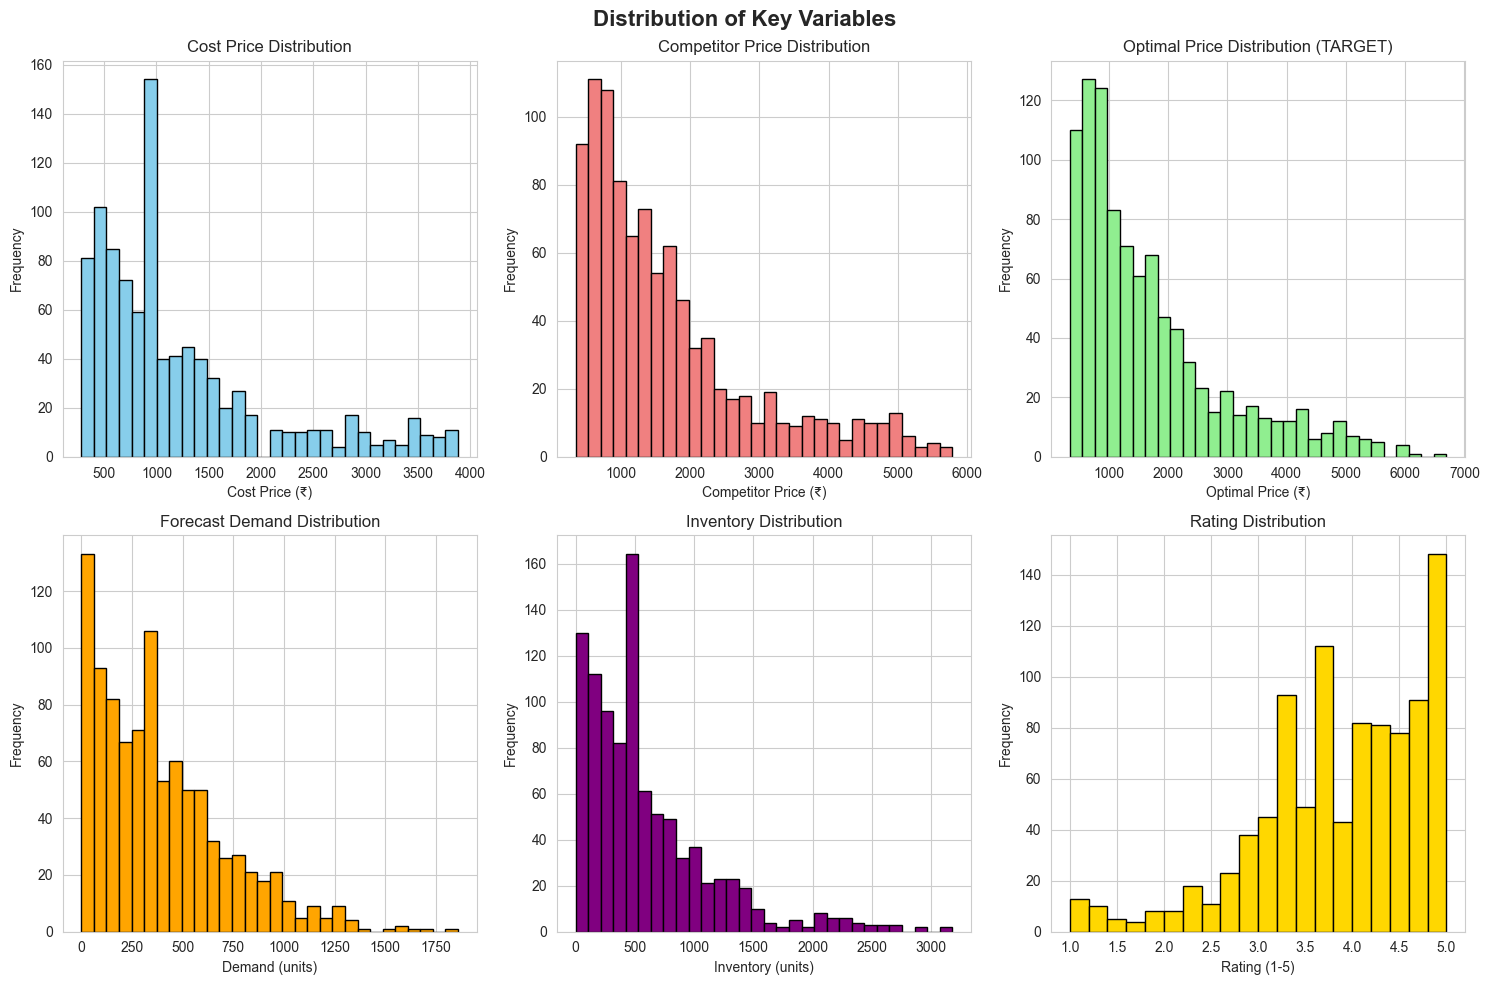

In [47]:
# Plot distributions of important columns
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Distribution of Key Variables', fontsize=16, fontweight='bold')

# 1. Cost Price
axes[0, 0].hist(df_clean['cost_price'], bins=30, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Cost Price Distribution')
axes[0, 0].set_xlabel('Cost Price (₹)')
axes[0, 0].set_ylabel('Frequency')

# 2. Competitor Price
axes[0, 1].hist(df_clean['competitor_price'], bins=30, color='lightcoral', edgecolor='black')
axes[0, 1].set_title('Competitor Price Distribution')
axes[0, 1].set_xlabel('Competitor Price (₹)')
axes[0, 1].set_ylabel('Frequency')

# 3. Optimal Price (TARGET)
axes[0, 2].hist(df_clean['optimal_price'], bins=30, color='lightgreen', edgecolor='black')
axes[0, 2].set_title('Optimal Price Distribution (TARGET)')
axes[0, 2].set_xlabel('Optimal Price (₹)')
axes[0, 2].set_ylabel('Frequency')

# 4. Forecast Demand
axes[1, 0].hist(df_clean['forecast_demand'], bins=30, color='orange', edgecolor='black')
axes[1, 0].set_title('Forecast Demand Distribution')
axes[1, 0].set_xlabel('Demand (units)')
axes[1, 0].set_ylabel('Frequency')

# 5. Inventory
axes[1, 1].hist(df_clean['inventory_on_hand'], bins=30, color='purple', edgecolor='black')
axes[1, 1].set_title('Inventory Distribution')
axes[1, 1].set_xlabel('Inventory (units)')
axes[1, 1].set_ylabel('Frequency')

# 6. Rating
axes[1, 2].hist(df_clean['rating'], bins=20, color='gold', edgecolor='black')
axes[1, 2].set_title('Rating Distribution')
axes[1, 2].set_xlabel('Rating (1-5)')
axes[1, 2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

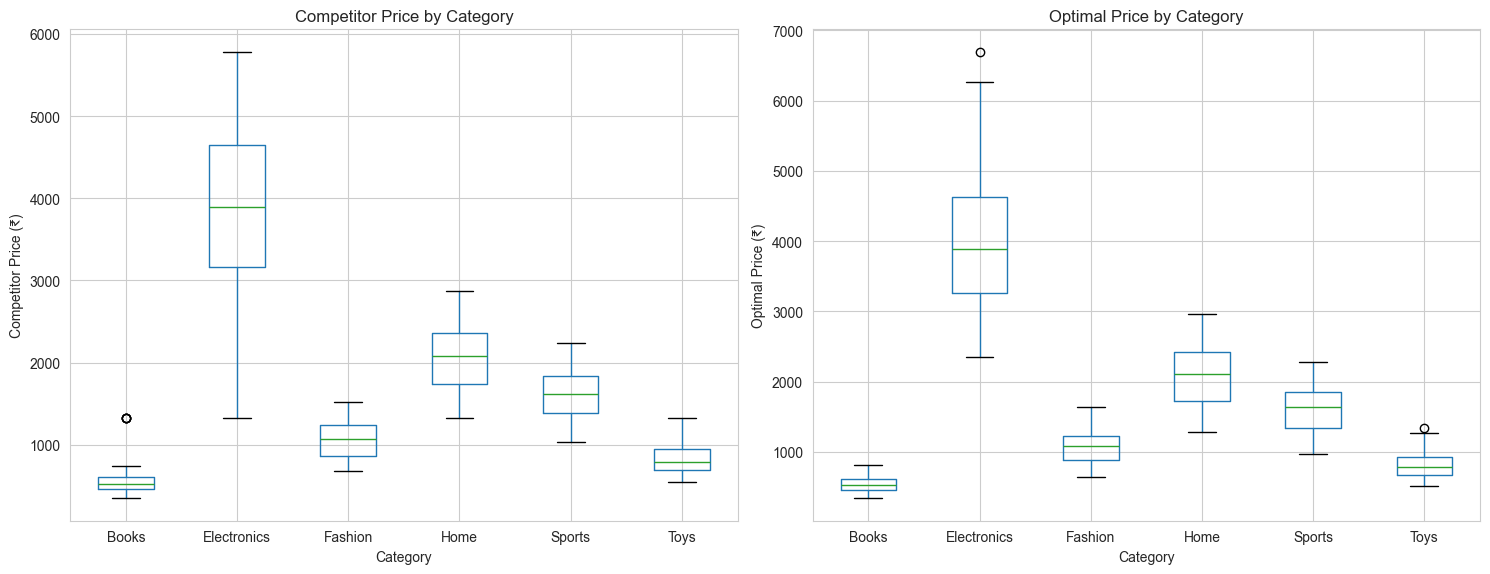


Average prices by category:
             competitor_price  optimal_price
category                                    
Books                  547.67         536.49
Electronics           3914.17        3996.98
Fashion               1066.63        1070.89
Home                  2059.48        2077.52
Sports                1623.55        1618.89
Toys                   814.08         797.21


In [48]:
# Compare prices across categories
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# 1. Competitor price by category
df_clean.boxplot(column='competitor_price', by='category', ax=axes[0])
axes[0].set_title('Competitor Price by Category')
axes[0].set_xlabel('Category')
axes[0].set_ylabel('Competitor Price (₹)')
axes[0].get_figure().suptitle('')  # Remove default title

# 2. Optimal price by category
df_clean.boxplot(column='optimal_price', by='category', ax=axes[1])
axes[1].set_title('Optimal Price by Category')
axes[1].set_xlabel('Category')
axes[1].set_ylabel('Optimal Price (₹)')
axes[1].get_figure().suptitle('')

plt.tight_layout()
plt.show()

print("\nAverage prices by category:")
print(df_clean.groupby('category')[['competitor_price', 'optimal_price']].mean().round(2))

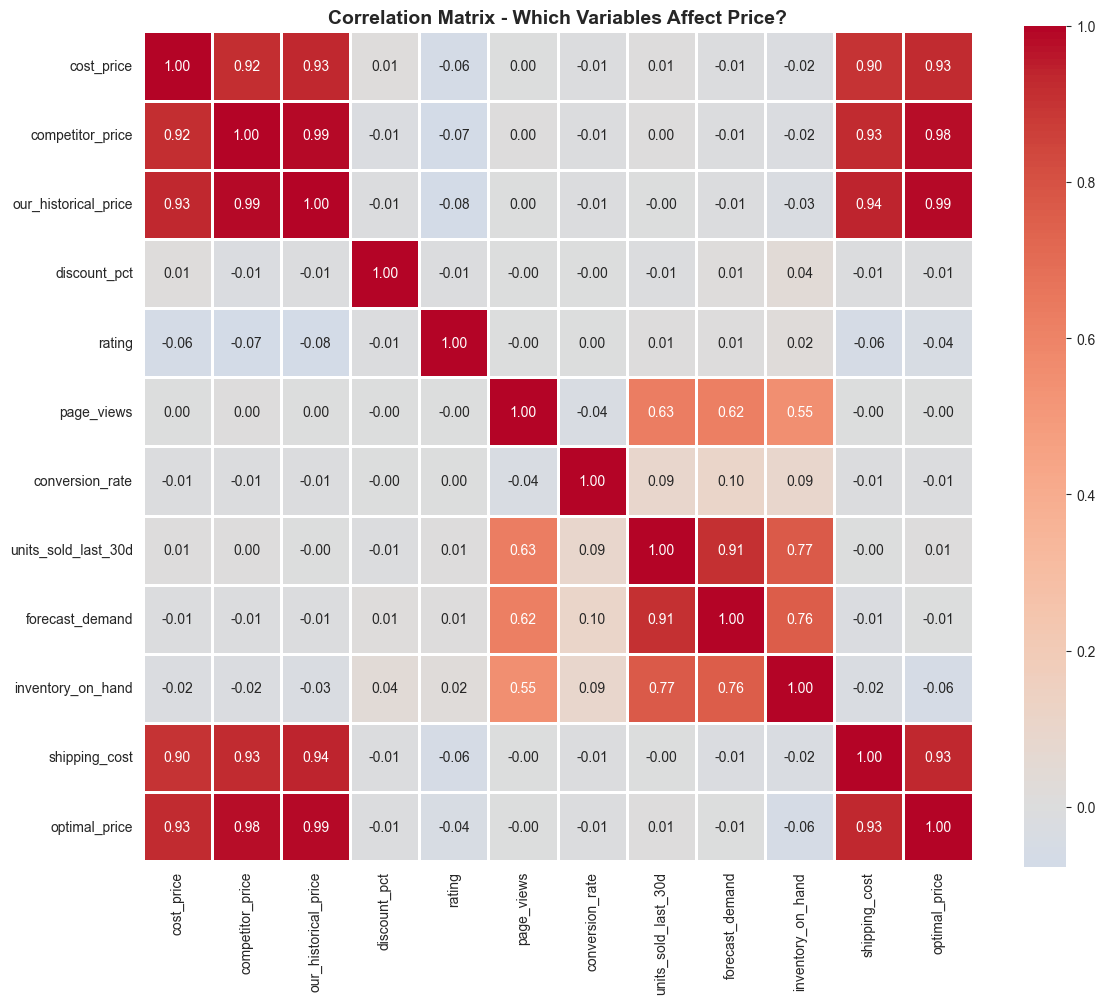


=== TOP CORRELATIONS WITH OPTIMAL PRICE ===
optimal_price           1.000000
our_historical_price    0.989766
competitor_price        0.979463
shipping_cost           0.931746
cost_price              0.925644
units_sold_last_30d     0.005611
page_views             -0.001548
forecast_demand        -0.005234
conversion_rate        -0.007931
discount_pct           -0.012777
rating                 -0.041343
inventory_on_hand      -0.057038
Name: optimal_price, dtype: float64


In [49]:
# Correlation matrix - which variables are related?
fig, ax = plt.subplots(figsize=(12, 10))

# Select numeric columns for correlation
numeric_cols = ['cost_price', 'competitor_price', 'our_historical_price', 
                'discount_pct', 'rating', 'page_views', 'conversion_rate',
                'units_sold_last_30d', 'forecast_demand', 'inventory_on_hand', 
                'shipping_cost', 'optimal_price']

correlation = df_clean[numeric_cols].corr()

# Create heatmap
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, ax=ax)
ax.set_title('Correlation Matrix - Which Variables Affect Price?', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n=== TOP CORRELATIONS WITH OPTIMAL PRICE ===")
optimal_corr = correlation['optimal_price'].sort_values(ascending=False)
print(optimal_corr)

In [50]:
# Prepare features and target for ML model
print("=== PREPARING DATA FOR ML MODEL ===\n")

# Select features (X) - the inputs our model will use
feature_cols = ['competitor_price', 'forecast_demand', 'inventory_on_hand']
X = df_clean[feature_cols]

# Target variable (y) - what we want to predict
y = df_clean['optimal_price']

print(f"Features (X) shape: {X.shape}")
print(f"Target (y) shape: {y.shape}")
print(f"\nFeature columns: {feature_cols}")
print(f"\nFirst 5 rows of features:")
print(X.head())
print(f"\nFirst 5 target values:")
print(y.head())

=== PREPARING DATA FOR ML MODEL ===

Features (X) shape: (960, 3)
Target (y) shape: (960,)

Feature columns: ['competitor_price', 'forecast_demand', 'inventory_on_hand']

First 5 rows of features:
   competitor_price  forecast_demand  inventory_on_hand
0           3432.78           454.93              672.0
1           2820.53           377.48              748.0
2            739.22           318.64              110.0
3           1065.60            26.93               65.0
4            550.63           202.73              452.0

First 5 target values:
0    3557.91
1    2494.13
2     679.40
3     962.78
4     514.71
Name: optimal_price, dtype: float64


In [51]:
from sklearn.model_selection import train_test_split

# Split data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("=== DATA SPLIT ===\n")
print(f"Training set: {X_train.shape[0]} rows")
print(f"Testing set: {X_test.shape[0]} rows")
print(f"\nTotal: {X_train.shape[0] + X_test.shape[0]} rows")
print(f"\nWe'll train on {X_train.shape[0]} rows and test on {X_test.shape[0]} rows")

=== DATA SPLIT ===

Training set: 768 rows
Testing set: 192 rows

Total: 960 rows

We'll train on 768 rows and test on 192 rows


In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

print("=== TRAINING MODEL ===\n")

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

print("✅ Model trained successfully!")

# Make predictions on test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\n=== MODEL PERFORMANCE ===")
print(f"Mean Absolute Error (MAE): ₹{mae:.2f}")
print(f"Root Mean Squared Error (RMSE): ₹{rmse:.2f}")
print(f"R² Score: {r2:.4f}")

print("\n=== MODEL COEFFICIENTS ===")
for feature, coef in zip(feature_cols, model.coef_):
    print(f"{feature}: {coef:.4f}")
print(f"Intercept: {model.intercept_:.2f}")

=== TRAINING MODEL ===

✅ Model trained successfully!

=== MODEL PERFORMANCE ===
Mean Absolute Error (MAE): ₹122.28
Root Mean Squared Error (RMSE): ₹311.45
R² Score: 0.9344

=== MODEL COEFFICIENTS ===
competitor_price: 1.0029
forecast_demand: 0.2974
inventory_on_hand: -0.2160
Intercept: 14.46


In [53]:
import pickle
import os

# Create model directory if it doesn't exist
os.makedirs('model', exist_ok=True)

# Save the model
model_path = 'model/pricing_model_syn.pkl'
with open(model_path, 'wb') as f:
    pickle.dump(model, f)

print(f"✅ Model saved to: {model_path}")
print(f"\nModel details:")
print(f"  - Type: Linear Regression")
print(f"  - Features: {feature_cols}")
print(f"  - R² Score: {r2:.4f}")
print(f"  - MAE: ₹{mae:.2f}")

✅ Model saved to: model/pricing_model_syn.pkl

Model details:
  - Type: Linear Regression
  - Features: ['competitor_price', 'forecast_demand', 'inventory_on_hand']
  - R² Score: 0.9344
  - MAE: ₹122.28
